In [1]:
import pandas as pd

In [2]:
data = pd.read_table(r'NHANES-ICRSR25504-0013-Data.tsv', low_memory=False)

In [3]:
# listing all column names
print list(data)

['SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMXLEG', 'BMILEG', 'BMXCALF', 'BMICALF', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXTHICR', 'BMITHICR', 'BMXTRI', 'BMITRI', 'BMXSUB', 'BMISUB', 'SDDSRVYR', 'RIDSTATR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1', 'DMQMILIT', 'DMDBORN', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDSCHOL', 'DMDMARTL', 'DMDHHSIZ', 'DMDFMSIZ', 'INDHHINC', 'INDFMINC', 'INDFMPIR', 'RIDEXPRG', 'DMDHRGND', 'DMDHRAGE', 'DMDHRBRN', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANG', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA']


In [4]:
# generating a new DataFrame for adults at ages between 18 and 60
sub = data[(data['RIDAGEYR'] >= 18) & (data['RIDAGEYR'] <= 60)]

In [5]:
sub.groupby('RIDRETH1').size()

RIDRETH1
1     934
2     145
3    1647
4    1011
5     189
dtype: int64

RIDRETH1 2 and 5 has a much smaller sample number than other RIDRETH1 groups. I'll exclude RIDRETH1 2 and 5 when evaluating algorithms.

In [6]:
# generating a new DataFrame excluding RIDRETH1 2 and 5
sub = sub[(sub['RIDRETH1'] != 2) & (sub['RIDRETH1'] != 5)]

In [7]:
# generating a new DataFrame including variables of detectable body measurements, gender and age.
response_var = ['RIDRETH1']
explanatory_var = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXCALF','BMXARML', 'BMXARMC', 'BMXWAIST', 'BMXTRI', 
                   'BMXSUB', 'BMXTHICR', 'RIAGENDR', 'RIDAGEYR']
sub1 = sub[explanatory_var + response_var]

In [8]:
# shape of dataset sub1
sub1.shape

(3592, 14)

In [9]:
# first 5 rows of dataset subm1
sub1.head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXCALF,BMXARML,BMXARMC,BMXWAIST,BMXTRI,BMXSUB,BMXTHICR,RIAGENDR,RIDAGEYR,RIDRETH1
4,75.2,156,30.9,38,36.6,35,35.8,96,,,53.7,2,44,4
15,76.4,184,22.57,49.1,36.7,41.4,28.6,84.2,12.8,7.4,52.4,1,19,3
23,82.9,167.6,29.51,34.5,36.5,38.5,39.5,101.2,16.6,32.4,54,2,59,4
24,94.1,153.6,39.88,33.8,39.6,34,38.2,130.4,29.4,36,53.9,2,27,1
28,79.9,159.5,31.41,39,41.5,34.3,35.5,91.4,,,57.1,2,43,4


In [ ]:
# changing variables to numeric
for colname in explanatory_var:
    sub1[colname] = pd.to_numeric(sub1[colname], errors='coerce')

In [11]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 4 to 9948
Data columns (total 14 columns):
BMXWT       3559 non-null float64
BMXHT       3562 non-null float64
BMXBMI      3556 non-null float64
BMXLEG      3411 non-null float64
BMXCALF     3457 non-null float64
BMXARML     3475 non-null float64
BMXARMC     3475 non-null float64
BMXWAIST    3455 non-null float64
BMXTRI      3103 non-null float64
BMXSUB      2662 non-null float64
BMXTHICR    3407 non-null float64
RIAGENDR    3592 non-null int64
RIDAGEYR    3592 non-null int64
RIDRETH1    3592 non-null int64
dtypes: float64(11), int64(3)
memory usage: 420.9 KB


In [13]:
# recode RIDRETH1
sub1['RIDRETH1'].replace(to_replace=[1, 3, 4], value=['Mexican_American',  
                                                      'White_American', 
                                                      'Black_American'], inplace=True)

In [14]:
sub1 = sub1.dropna()
sub1.describe()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXCALF,BMXARML,BMXARMC,BMXWAIST,BMXTRI,BMXSUB,BMXTHICR,RIAGENDR,RIDAGEYR
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,75.167613,169.299223,26.113321,40.224773,37.861933,37.331795,31.355345,90.921262,17.448718,19.352623,52.163748,1.495069,34.407495
std,16.480784,9.974272,4.670629,3.796772,3.718947,2.789389,4.262982,13.130786,8.058431,7.769431,5.950257,0.500074,12.798081
min,36.700000,142.100000,14.650000,24.200000,24.200000,29.400000,19.000000,56.000000,3.000000,5.000000,29.300000,1.000000,18.000000
25%,63.200000,162.050000,22.765000,37.600000,35.400000,35.300000,28.300000,81.100000,11.000000,13.000000,48.200000,1.000000,23.000000
50%,73.800000,168.800000,25.670000,40.200000,37.700000,37.200000,31.200000,89.800000,16.200000,18.600000,51.700000,1.000000,33.000000
75%,84.550000,176.300000,28.905000,42.800000,40.100000,39.300000,34.200000,99.600000,23.000000,24.900000,55.700000,2.000000,45.000000
max,180.200000,200.700000,47.150000,53.200000,54.000000,48.600000,50.600000,149.500000,42.900000,40.200000,82.700000,2.000000,60.000000


In [15]:
# checking the number of instances that belong to each RIDRETH1 class
sub1.groupby('RIDRETH1').size()

RIDRETH1
Black_American       616
Mexican_American     654
White_American      1265
dtype: int64

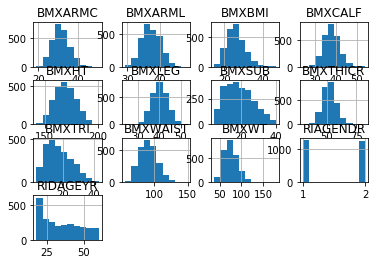

In [16]:
# histograms
import matplotlib.pyplot as plt
sub1.hist()
plt.show()

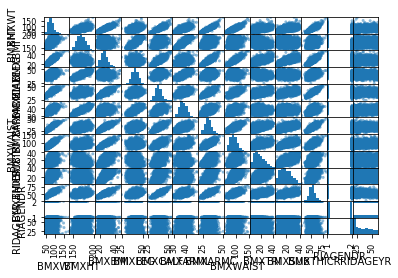

In [17]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(sub1)
plt.show()

In [18]:
# generating train dataset and validation dataset
from sklearn import model_selection
array = sub1.values
explanatory = array[:,0:13]
responsive = array[:,13]
explanatory_train, explanatory_validation, responsive_train, responsive_validation = model_selection.train_test_split(
    explanatory, responsive, test_size=0.2, random_state=10)

In [19]:
# algorithms used for evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [21]:
# making a list of algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('SGD', SGDClassifier()))

# evaluating each algorithm in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    cv_results = model_selection.cross_val_score(model, explanatory_train, responsive_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print (msg)

LR: 0.650422 (0.024316)
LDA: 0.645971 (0.014392)
RF: 0.587268 (0.023801)
ET: 0.576489 (0.041656)
KNN: 0.526620 (0.029733)
CART: 0.535536 (0.035580)
NB: 0.515771 (0.025366)
SVM: 0.513798 (0.042307)
MLP: 0.541982 (0.053734)
SGD: 0.448695 (0.093134)


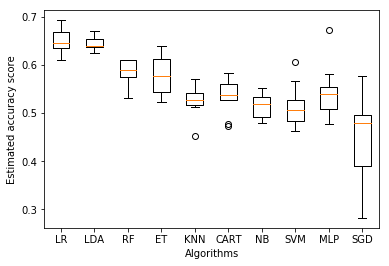

In [22]:
# making a plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Algorithms')
plt.ylabel('Estimated accuracy score')
plt.show()

In the models that we tested, the LR and LDA algorithms had the highest estimated accuracy score (0.65). Next we can check the accuracy of the models on the validation dataset.

In [23]:
# Checking accuracy of the LR model and making predictions on validation dataset
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(explanatory_train, responsive_train)
predictions = LR.predict(explanatory_validation)
print 'Accuracy score of LR algorithm', '\n', (accuracy_score(responsive_validation, predictions)), '\n'
print 'Confusion matrix', '\n', (confusion_matrix(responsive_validation, predictions)), '\n'
print 'Classification report', '\n', (classification_report(responsive_validation, predictions))

Accuracy score of LR algorithm 
0.650887573964 

Confusion matrix 
[[ 52  20  54]
 [  5  81  67]
 [ 18  13 197]] 

Classification report 
                  precision    recall  f1-score   support

  Black_American       0.69      0.41      0.52       126
Mexican_American       0.71      0.53      0.61       153
  White_American       0.62      0.86      0.72       228

     avg / total       0.67      0.65      0.64       507



The accuracy of LR algorithm is 0.65. The confusion matrix shows the number of errors made. The Classification report shows precision, recall, f1-score, and support. Precision is the number of True Positives divided by the number of True Positives and False Positives. A low precision indicates a large number of False Positives. Recall is the number of True Positives divided by the number of True Positives and the number of False Negatives. A low recall indicates many False Negatives. The f1-score is the 2*((precision*recall)/(precision+recall)). The f1-score conveys the balance between the precision and the recall. Similar results were obtained when making predictions using LDA algorithm on validation dataset.

In [24]:
# Checking accuracy of the LDA model and making predictions on validation dataset
LDA = LinearDiscriminantAnalysis()
LDA.fit(explanatory_train, responsive_train)
predictions = LDA.predict(explanatory_validation)
print 'Accuracy score of LDA algorithm', '\n', (accuracy_score(responsive_validation, predictions)), '\n'
print 'Confusion matrix', '\n', (confusion_matrix(responsive_validation, predictions)), '\n'
print 'Classification report', '\n', (classification_report(responsive_validation, predictions))

Accuracy score of LDA algorithm 
0.642998027613 

Confusion matrix 
[[ 52  19  55]
 [  5  81  67]
 [ 19  16 193]] 

Classification report 
                  precision    recall  f1-score   support

  Black_American       0.68      0.41      0.51       126
Mexican_American       0.70      0.53      0.60       153
  White_American       0.61      0.85      0.71       228

     avg / total       0.66      0.64      0.63       507

